# Predicting Heart Failure Based on Clinical Data

This is in partial fulfillment of the course Statistical Modeling and simulation (CSMODEL). 

Submitted by: 
- ANG, Charlene
- CAI, Mark Jayson
- SANTOS, Carlo Luis
S15

Submitted to:

Mr. Thomas James Tiam-Lee 

September 22, 2020

## Heart Failure Prediction

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### Introduction

Heart failure is a persistent and progressive cardiovascular condition where in the heart is unable to pump the right amount of oxygenated blood through out the body. Lifestyle and other prevailing conditions of a person can affect their risk of having heart failure. Every year, 31% of the total deaths aroud the world is caused by cardiovascular diseases. As knowledge about these conditions broaden through the years, there are are a lot of factors that can help predict the posibility of heart failure to occur. With the help of modern tools, survival rate of people with heart disease, early detection of heart diseases and deeper understanding of these cnditions can transpire that may be of great help for future generations to have a healthier lives.

In this notebook, the researchers aim to predict heart failure based on Clinical data, and know which factors affect the occurance of heart failure **TAMA BA?**


### Data Collection

The dataset was collected from 299 patients who were diagnosed with heart failure in 2015.

## Exploratory Data Analysis

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import seaborn as sns
from functools import reduce
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from scipy.stats import ttest_ind

### Loading the Dataset 

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Data Cleaning

#### Duplicates

In [5]:
df.duplicated().sum()

0

#### Null values

In [6]:
df.isna().sum().sort_values()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Based on the values presented above, there are no categorical data, no duplication of observations and no nullvalues present in the dataset, thus, the researchers will no longer perform data cleaning

### Exploratory Data Analysis Questions

**Question#1**: What are the average values of age that are most likely to contract heart failure?

First lets look at the age distribution of the patients

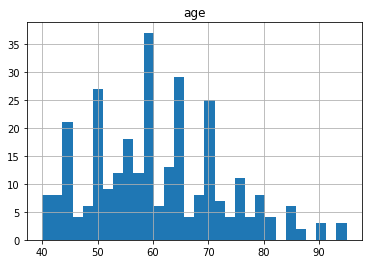

In [7]:
df.hist("age", bins=30)
plt.show()

Let's now look at the average, median, and standard deviation age of the patients.

In [8]:
df.agg({"age": ["mean", "median", "std", "count"]})

,age
mean,60.833893
median,60.000000
std,11.894809
count,299.000000


**Answer#1**: 60.83 is the average age in which patients contract a heart disease. 60 is the median age. And the standard deviation is 11.89.

**Question#2**: Is Age and Sex an indicator for Death Event?

Let's first look at the death event and the age of the patients.

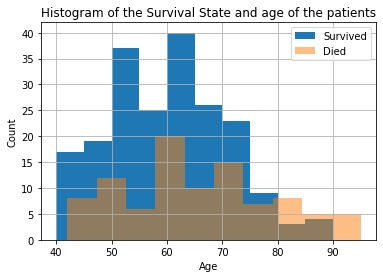

In [9]:
x = df.loc[df['DEATH_EVENT'] == 0, ['age']]
y = df.loc[df['DEATH_EVENT'] == 1, ['age']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and age of the patients')
plt.legend(loc='upper right')
plt.show()

Let's now look at the death event and the sex of the patient.

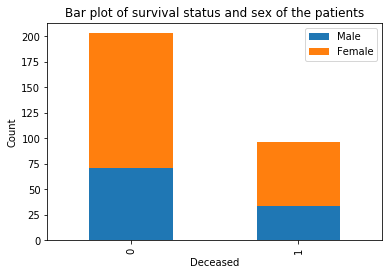

In [10]:
df.groupby(['DEATH_EVENT', 'sex']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Deceased')
plt.ylabel('Count')
plt.title('Bar plot of survival status and sex of the patients')
plt.legend(["Male", "Female"])
plt.show()

**Answer#2**: There is not enough information to conclude that sex is an indicator of death events of patients who suffered from heart failure

**Question#3**:What is the distribution of patients in the following clinical features of the dataset?

Here we are going to look at the percentage of patients who have anemia, diabetes, hypertension, and those who smoke.

#### Anaemia Percentage

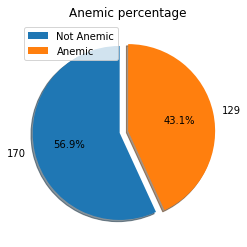

In [11]:
val = df['anaemia'].value_counts()
labels = ['Not Anemic', 'Anemic']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Anemic percentage')
plt.legend(labels)
plt.show()

#### Diabetic Percentage

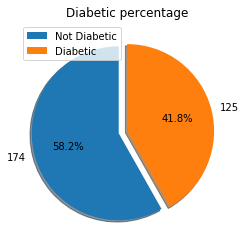

In [12]:
val = df['diabetes'].value_counts()
labels = ['Not Diabetic', 'Diabetic']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Diabetic percentage')
plt.legend(labels)
plt.show()

Hypertension Percentage

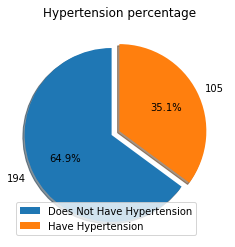

In [13]:
val = df['high_blood_pressure'].value_counts()
labels = ['Does Not Have Hypertension', 'Have Hypertension']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Hypertension percentage')
plt.legend(labels)
plt.show()

#### Smoking percentage

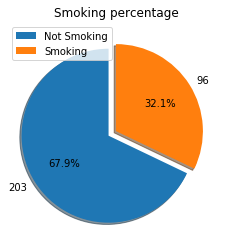

In [14]:
val = df['smoking'].value_counts()
labels = ['Not Smoking', 'Smoking']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Smoking percentage')
plt.legend(labels)
plt.show()

**Answer#3**:

**Question#4**: What is the correlation of each variable to the death event? 

(Note: Baka pwede na isama sa question 2)
- Creatinine Phosphokinase
- Ejection fraction
- Level of serum creatinine
- Level of serum sodium
- Platelets in the blood

#### Correlation of the CPK enzyme in the blood and the survival state of the patient

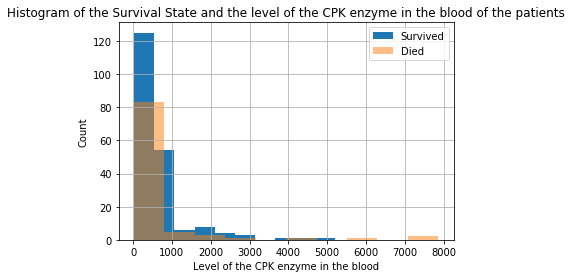

In [15]:
x = df.loc[df['DEATH_EVENT'] == 0, ['creatinine_phosphokinase']]
y = df.loc[df['DEATH_EVENT'] == 1, ['creatinine_phosphokinase']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Level of the CPK enzyme in the blood')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the level of the CPK enzyme in the blood of the patients')
plt.legend(loc='upper right')
plt.show()

Lower level of the CPK enzyme in the blood contribute to the patients' survival.

#### Correlation of the percentage of blood leaving the heart at each contraction and the survival state of the patient

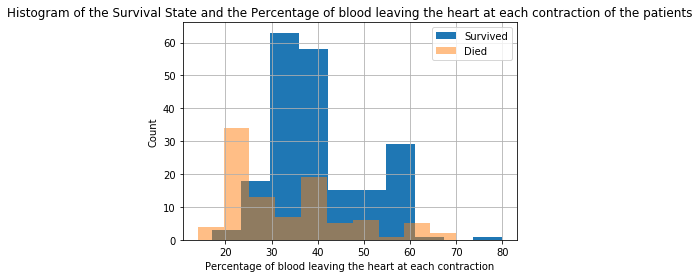

In [16]:
x = df.loc[df['DEATH_EVENT'] == 0, ['ejection_fraction']]
y = df.loc[df['DEATH_EVENT'] == 1, ['ejection_fraction']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Percentage of blood leaving the heart at each contraction')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the Percentage of blood leaving the heart at each contraction of the patients')
plt.legend(loc='upper right')
plt.show()

Higher ejection fraction contribute to the patients' survival.

#### Correlation of the platelets in the blood and the survival state of the patient

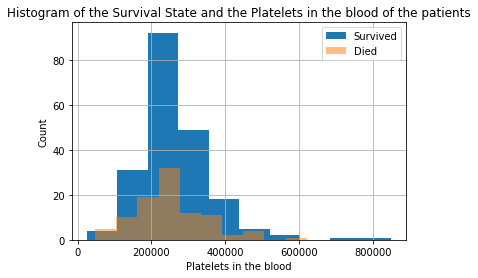

In [17]:
x = df.loc[df['DEATH_EVENT'] == 0, ['platelets']]
y = df.loc[df['DEATH_EVENT'] == 1, ['platelets']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Platelets in the blood')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the Platelets in the blood of the patients')
plt.legend(loc='upper right')
plt.show()

Higher amount of platelets in the blood contribute to the patients' survival.

#### Correlation of the level of serum creatinine and the survival state of the patient

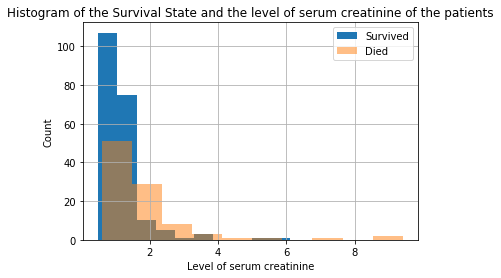

In [18]:
x = df.loc[df['DEATH_EVENT'] == 0, ['serum_creatinine']]
y = df.loc[df['DEATH_EVENT'] == 1, ['serum_creatinine']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Level of serum creatinine')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the level of serum creatinine of the patients')
plt.legend(loc='upper right')
plt.show()

Lower levels of serum creatinine contribute to the patients' survival.

#### Correlation of the level of serum sodium in the blood and the survival state of the patient

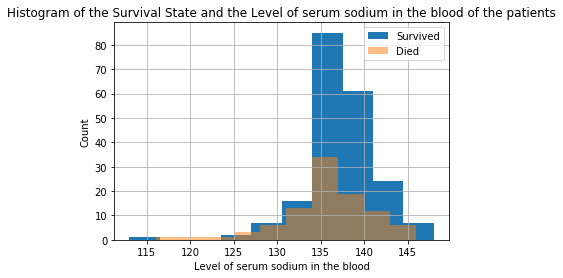

In [19]:
x = df.loc[df['DEATH_EVENT'] == 0, ['serum_sodium']]
y = df.loc[df['DEATH_EVENT'] == 1, ['serum_sodium']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Level of serum sodium in the blood')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the Level of serum sodium in the blood of the patients')
plt.legend(loc='upper right')
plt.show()

#### Heatmap of all the variables in the dataset

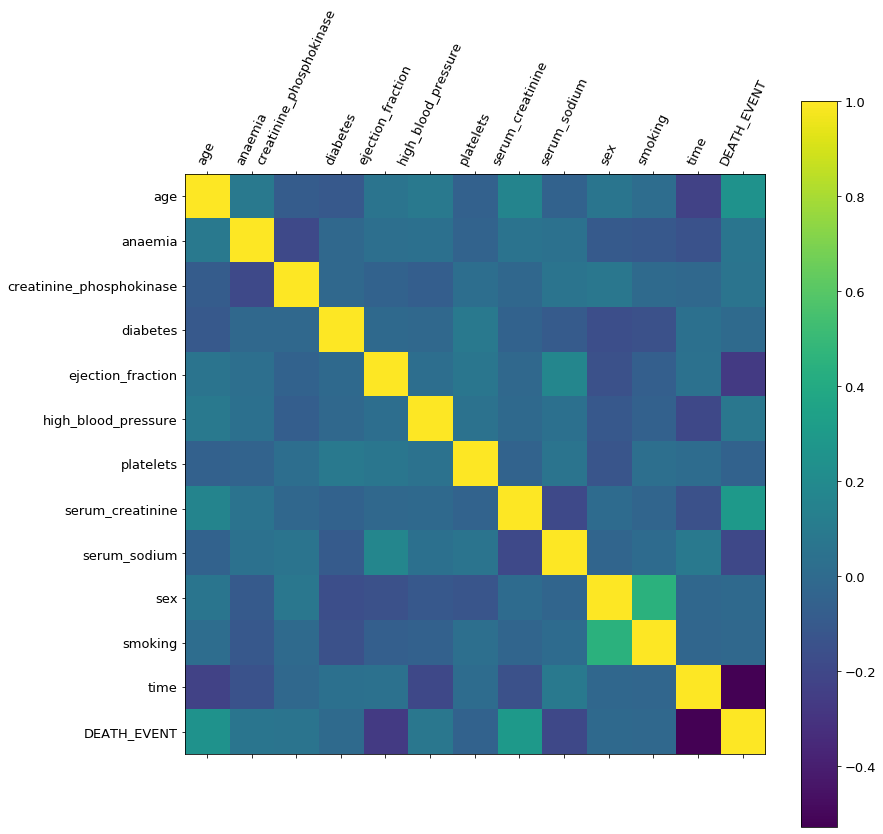

In [44]:
f = plt.figure(figsize=(13, 13))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=13, rotation=65)
plt.yticks(range(df.shape[1]), df.columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13)

Here we can see that higher levels of serum sodium in the blood contribute to the patients' survival.

**Answer#4**:

## Research Questions

**Research Question #1** :Given the level of age, time, serum sodium, serum creatinine, and ejection fraction, what is the chance of heart failure?


This research question is significant because it is the main purpose of the dataset. Being able to find out the chance of heart failure based on the correlated variables such as age, time, serum sodium, serum creatinine, and ejection fraction, will significantly help out the medical field.

Due to the correlation analysis from the previous parts, the proponents have chosen the following variables as the prediction variables for heart failure: age, time, serum sodium, serum creatinine, and ejection fraction.

In [20]:
variables = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
x = variables
y = df['DEATH_EVENT']

###### Train Test Split

The Train Test Split is done to effectively separate the training data from the actual evaluation data that will be used for verifying the effectivity of the model performance

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

###### Support Vector Classification
Support Vector Classification (SVC) was used as a marchine learning algorithm because of its efficiency when the dataset is relatively small. SVC draws a line between the dataset to separate the classification between two states which is indicating whether given the variables of age, ejection_fraction, serim_creatinine, serum_sodium, and time, that heart failure might occur.

In [22]:
from sklearn.svm import SVC
svc = SVC(random_state=0, kernel = 'rbf')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
y_pred = svc.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [24]:
con_matrix = confusion_matrix(y_test, y_pred)
svm_accuracy = accuracy_score(y_test, y_pred)
print(svm_accuracy)

0.9


This shows a 90% accuracy on predicting whether heart failure will occur to the data observation given the varialbes of age, ejection_fraction, serim_creatinine, serum_sodium, and time. The result is significant because it can give a warning to people whether they are in risk of a heart failure or not.

**Research Question #2** : Find the confidence interval of the level of serum creatinine and ejection fraction for those who have heart failure death event between high blood and non high-blood?

According to the authors of the dataset, heart failure can be predicted from the level of serum creatinine and ejection fraction, therefore the proponents decided to see what the level of serum creatinine and ejection fraction would result into heart failure by finding out the confidence interval for those who are alive and those who died of heart failure.

##### Confidence Interval of Serum Creatinine for those who are Alive

In [25]:
alive_df = df.loc[df['DEATH_EVENT'] == 0]
dead_df = df.loc[df['DEATH_EVENT'] == 1]

z_star_95 = norm.ppf(0.975)
n = 40
alive_df = alive_df.sample(n)
alive_agg_serum = alive_df.agg({"serum_creatinine": ["mean", "median", "std"]})
alive_agg_serum

,serum_creatinine
mean,1.240500
median,1.000000
std,0.920507


In [26]:
sample_mean_alive_serum = alive_agg_serum.loc["mean"][0]
sample_median_alive_serum = alive_agg_serum.loc["median"][0]
sample_std_alive_serum = alive_agg_serum.loc["std"][0]
moe_alive_serum = z_star_95 * (sample_std_alive_serum / np.sqrt(n))
print(sample_mean_alive_serum - moe_alive_serum, sample_mean_alive_serum + moe_alive_serum)

0.9552371772201969 1.5257628227798026


The average level of serum creatinine in the blood for those who did not suffer from heart failure with a 95% confidence is 0.9979 to 1.4400. 

##### Confidence Interval of Serum Creatinine for those who are Deceased

In [27]:
dead_df = dead_df.sample(n)
dead_agg_serum = dead_df.agg({"serum_creatinine": ["mean", "median", "std"]})
dead_agg_serum

,serum_creatinine
mean,1.87800
median,1.30000
std,1.56615


In [28]:
sample_mean_dead_serum = dead_agg_serum.loc["mean"][0]
sample_median_dead_serum = dead_agg_serum.loc["median"][0]
sample_std_dead_serum = dead_agg_serum.loc["std"][0]
moe_dead_serum = z_star_95 * (sample_std_dead_serum / np.sqrt(n))
print(sample_mean_dead_serum - moe_dead_serum, sample_mean_dead_serum + moe_dead_serum)

1.3926539215595626 2.3633460784404368


The average level of serum creatinine in the blood for those who passed away from heart failure with a 95% confidence is 1.3648 to 1.8761. 

##### Confidence Interval of Ejection Fraction for those who are Alive

In [29]:
alive_df = alive_df.sample(n)
alive_agg_eject = alive_df.agg({"ejection_fraction": ["mean", "median", "std"]})
alive_agg_eject

,ejection_fraction
mean,37.925000
median,35.000000
std,11.173199


In [30]:
sample_mean_alive_eject = alive_agg_eject.loc["mean"][0]
sample_median_alive_eject = alive_agg_eject.loc["median"][0]
sample_std_alive_eject = alive_agg_eject.loc["std"][0]
moe_alive_eject = z_star_95 * (sample_std_alive_eject / np.sqrt(n))
print(sample_mean_alive_eject - moe_alive_eject, sample_mean_alive_eject + moe_alive_eject)

34.46245326147207 41.387546738527924


The average percentage of blood leaving the heart at each contraction or the ejection fraction for those who did not suffer from heart failure with a 95% confidence is 37.2829 to 44.9670. 

##### Confidence Interval of Ejection Fraction for those who are Deceased

In [31]:
dead_df = dead_df.sample(n)
dead_agg_eject = dead_df.agg({"ejection_fraction": ["mean", "median", "std"]})
dead_agg_eject

,ejection_fraction
mean,35.500000
median,36.500000
std,11.907765


In [32]:
sample_mean_dead_eject = dead_agg_eject.loc["mean"][0]
sample_median_dead_eject = dead_agg_eject.loc["median"][0]
sample_std_dead_eject = dead_agg_eject.loc["std"][0]
moe_dead_eject = z_star_95 * (sample_std_dead_eject / np.sqrt(n))
moe_dead_eject
print(sample_mean_dead_eject - moe_dead_eject, sample_mean_dead_eject + moe_dead_eject)

31.809813145023675 39.190186854976325


The average percentage of blood leaving the heart at each contraction or the ejection fraction for those who passed away from heart failure with a 95% confidence is 29.0104 to 35.5895. 

## Insights and Conclusion

## References 

World Health Organization.(n.d.). World heart day. Retrieved from https://www.who.int/cardiovascular_diseases/world-heart-day/en/ . Retrieved September 18, 2020

Heart Foundation. (n.d.). What is Heart Failure?. Retrieved from https://www.heartfoundation.org.au/conditions/heart-failure. Retrieved September 18, 2020